In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam

In [64]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [65]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [66]:
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [67]:
!kaggle competitions download -c digit-recognizer

  0% 0.00/9.16M [00:00<?, ?B/s]
100% 9.16M/9.16M [00:00<00:00, 84.1MB/s]
sample_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
  0% 0.00/6.09M [00:00<?, ?B/s]
100% 6.09M/6.09M [00:00<00:00, 100MB/s]


In [68]:
!ls

kaggle.json	       Submission.csv  test.csv.zip  train.csv.zip
sample_submission.csv  test.csv        train.csv


In [69]:
!unzip \*.zip  && rm *.zip

Archive:  train.csv.zip
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n

Archive:  test.csv.zip
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n

2 archives were successfully processed.


In [70]:
df = pd.read_csv('train.csv')

In [71]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [72]:
df.dtypes

label       int64
pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
            ...  
pixel779    int64
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
Length: 785, dtype: object

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


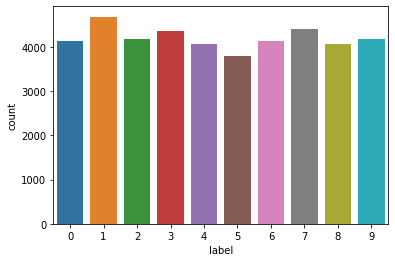

In [73]:
sns.countplot(df['label'])

In [74]:
df.drop('label', axis=1, inplace = True)


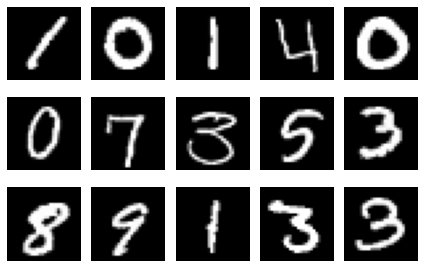

In [75]:

fig = plt.figure();
for i in range(0, 15):
    plt.subplot(3,5,(i+1))
    plt.imshow(df.iloc[[i]].values.reshape(28,28), cmap='gray')
    plt.axis('off')
fig.tight_layout()
plt.show()

In [76]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [77]:
X = train_data.loc[:, train_data.columns != 'label']
y = train_data['label']

In [78]:
print(X.shape)
print(y.shape)

(42000, 784)
(42000,)


In [79]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state = 101)

In [80]:

model = keras.Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

optimizer = Adam

In [81]:
model.compile(optimizer = 'adam' , loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [82]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)             

In [85]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_val = np.asarray(X_val)
y_val = np.asarray(y_val)

In [86]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_val = X_val.reshape(-1, 28, 28, 1)

In [87]:
import tensorflow
tensorflow.config.run_functions_eagerly(True)

In [88]:
model.fit(X_train,y_train, validation_data=(X_val, y_val),epochs=20,batch_size=100)

Epoch 1/20
  8/294 [..............................] - ETA: 4s - loss: 14.6665 - accuracy: 0.1497

/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


294/294 [==============================] - 6s 19ms/step - loss: 1.7769 - accuracy: 0.7186 - val_loss: 0.0712 - val_accuracy: 0.9772
Epoch 2/20
294/294 [==============================] - 6s 21ms/step - loss: 0.0902 - accuracy: 0.9729 - val_loss: 0.0455 - val_accuracy: 0.9864
Epoch 3/20
294/294 [==============================] - 6s 20ms/step - loss: 0.0660 - accuracy: 0.9787 - val_loss: 0.0425 - val_accuracy: 0.9863
Epoch 4/20
294/294 [==============================] - 6s 19ms/step - loss: 0.0516 - accuracy: 0.9834 - val_loss: 0.0330 - val_accuracy: 0.9898
Epoch 5/20
294/294 [==============================] - 6s 19ms/step - loss: 0.0371 - accuracy: 0.9896 - val_loss: 0.0425 - val_accuracy: 0.9880
Epoch 6/20
294/294 [==============================] - 6s 19ms/step - loss: 0.0376 - accuracy: 0.9886 - val_loss: 0.0405 - val_accuracy: 0.9887
Epoch 7/20
294/294 [==============================] - 6s 19ms/step - loss: 0.0321 - accuracy: 0.9899 - val_loss: 0.0430 - val_accuracy: 0.9882
Epoch 8/20

In [89]:
X_val = np.asarray(X_val).astype('float64')
y_val = np.asarray(y_val)

In [90]:
X_val = X_val.reshape(-1, 28, 28, 1)
preds = model.predict(X_val)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


In [91]:
preds

array([[3.5884137e-22, 1.0000000e+00, 9.0648416e-14, ..., 6.3619178e-16,
        3.1418857e-11, 2.9694126e-14],
       [2.0585333e-20, 5.2540052e-19, 5.9831155e-13, ..., 9.1572827e-16,
        1.2808304e-12, 4.1709205e-19],
       [1.0000000e+00, 3.2186422e-17, 8.3964343e-16, ..., 2.0022272e-14,
        4.6718251e-11, 6.7891174e-12],
       ...,
       [1.1187294e-16, 1.4718175e-14, 2.8132902e-16, ..., 6.6084122e-12,
        4.6969251e-10, 1.0000000e+00],
       [1.6454235e-29, 4.5263181e-26, 2.1480417e-23, ..., 1.3239566e-22,
        2.9640489e-21, 9.2119282e-26],
       [1.7468327e-07, 6.7860483e-12, 1.4204213e-12, ..., 1.5291908e-17,
        8.1570820e-11, 1.6248166e-12]], dtype=float32)

In [92]:
from sklearn.metrics import classification_report, confusion_matrix

/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


Confusion matrix, without normalization
[[1208    0    2    0    0    0    2    0    0    1]
 [   0 1397   10    0    6    0    1    6    2    0]
 [   0    2 1250    0    0    0    0    5    1    0]
 [   0    0    9 1266    0    4    0    1    2    2]
 [   0    1    0    0 1202    0    0    0    1    5]
 [   1    0    0    5    0 1102    3    0    8    2]
 [   1    0    0    0    6    1 1232    0    2    0]
 [   0    3    9    2    5    0    0 1293    0    3]
 [   1    0    0    0    3    1    2    0 1219    1]
 [   4    0    0    0   20    1    0    1    8 1275]]


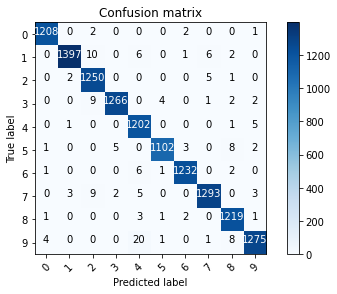

In [93]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(X_val).argmax(axis=1)
cm = confusion_matrix(y_val, p_test)
plot_confusion_matrix(cm, list(range(10)))


In [94]:
test_data
test_data = np.asarray(test_data).astype('float64')
test_data = test_data.reshape(-1, 28, 28, 1)
final_pred = model.predict(test_data)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


In [95]:
final_pred.shape

(28000, 10)

In [96]:
final_pred

array([[1.6892860e-25, 3.9116208e-24, 1.0000000e+00, ..., 3.9173484e-20,
        2.6349545e-27, 1.3860101e-19],
       [1.0000000e+00, 1.6294981e-18, 1.2075469e-15, ..., 1.7214814e-13,
        7.7016232e-12, 3.9120422e-11],
       [1.2971199e-16, 1.1283049e-14, 1.0240374e-13, ..., 2.9387093e-11,
        1.1734099e-11, 9.9999988e-01],
       ...,
       [5.2399753e-26, 4.3772686e-23, 6.0081754e-23, ..., 1.6232056e-20,
        7.3950154e-20, 6.5126353e-24],
       [1.0014862e-08, 5.4178435e-09, 5.9985139e-10, ..., 7.9097517e-06,
        5.8531299e-08, 9.9997473e-01],
       [3.0610436e-29, 2.5408815e-21, 1.0000000e+00, ..., 2.4079157e-22,
        1.8840911e-23, 1.1716464e-21]], dtype=float32)

In [ ]:
#ydf.to_csv('Submission.csv',index = False)

In [ ]:
#from google.colab import files
#files.download('Submission.csv')